In [1]:
from pathlib import Path
from scipy.io import wavfile

import librosa

# Cavitation file

In [2]:
datapath =  Path.cwd()/"data"/"s00000_191115_007_KesselpumpHD02_002_RP1_FC_01_P06_SB1_L0_KS_XXXX_YY_YYYY_ZZZZZZ_16.wav"
hc_samplerate, hc_data = wavfile.read(datapath)
print(f"sample rate: {hc_samplerate}")
print(f"data shape: {hc_data.shape}")

sample rate: 256000
data shape: (5120000,)


C:\Users\kinos\AppData\Local\Temp\ipykernel_35612\2904135079.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  hc_samplerate, hc_data = wavfile.read(datapath)


In [3]:
print(hc_data[:10])

[  133.  2008.   909.  2691.  8138.  7581.  1270. -3271. -2694.  -982.]


In [4]:
hc_length = hc_data.shape[0] / hc_samplerate
print(hc_length)

20.0


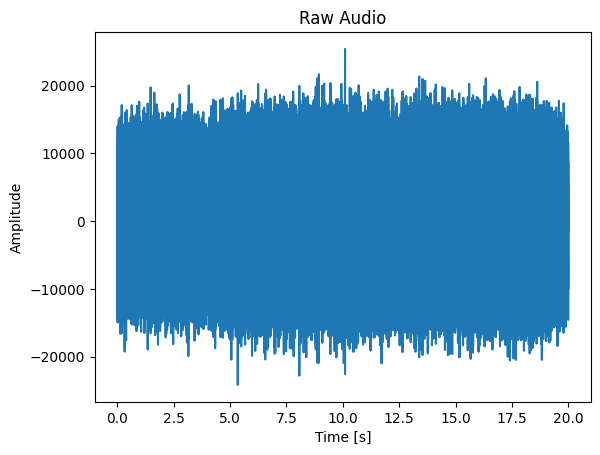

In [5]:
import matplotlib.pyplot as plt

import numpy as np

def plt_time_domain (length, data):
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data)


    plt.title("Raw Audio")

    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")


    plt.show()

plt_time_domain(hc_length,hc_data)
# hc_time = np.linspace(0., hc_length, hc_data.shape[0])
#
# plt.plot(hc_time, hc_data)
#
#
# plt.title("Raw Audio")
#
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude")
#
#
# plt.show()

## Fourier transform

In [6]:
from scipy.fftpack import fft, ifft

def fourier_trans_plot(length, data):
    N = data.shape[0]
    n = np.arange(N)
    freq = n/length
    data_fft = fft(data)

    plt.figure(figsize = (12, 6))
    plt.subplot(121)


    plt.stem(freq, np.abs(data_fft), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')

    plt.show()

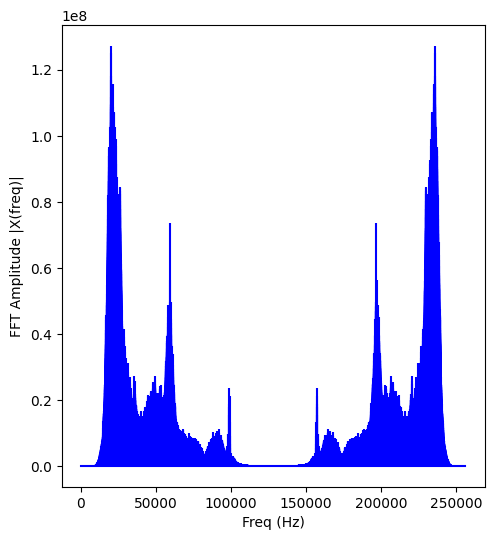

In [7]:
fourier_trans_plot(hc_length,hc_data)

# Non-cavitation file

In [8]:
nc_datapath =  Path.cwd()/"data"/"sxmany_200206_007_HKMNetzpumpe04_004_RP1_FC_01_C06_SB1_L0_XX_XXXX_YY_YYYY_ZZZZZZ_10.wav"
nc_samplerate, nc_data = wavfile.read(nc_datapath)
print(f"sample rate: {nc_samplerate}")
print(f"data shape: {nc_data.shape}")

sample rate: 256000
data shape: (5120000,)


C:\Users\kinos\AppData\Local\Temp\ipykernel_35612\1882805738.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  nc_samplerate, nc_data = wavfile.read(nc_datapath)


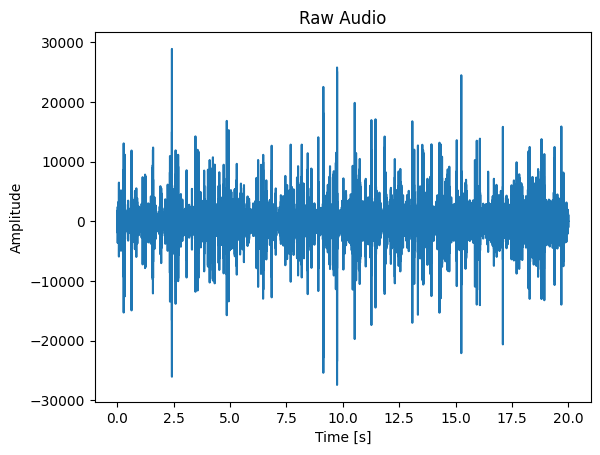

In [9]:
nc_length = nc_data.shape[0] / nc_samplerate

plt_time_domain(nc_length,nc_data)


## Fourier transform

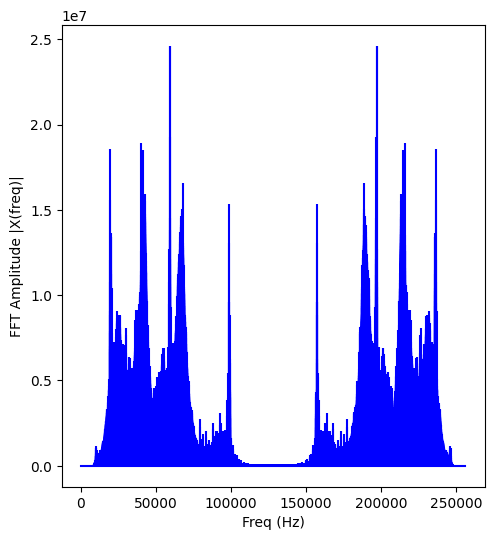

In [10]:
fourier_trans_plot(nc_length,nc_data)

## Splitting the dataset in 3s samples

The paper "AN ACOUSTIC SIGNAL CAVITATION DETECTION FRAMEWORK BASED ON XGBOOST WITH ADAPTIVE SELECTION FEATURE ENGINEERING", which was able to achieve state-of-the-art performance, uses 3 seconds samples.
Thus, the 20 second sample will be split in multiple 3 second samples.

In [11]:
hc_seg_len = hc_samplerate * 3

sections = int(np.ceil(len(hc_data) / hc_seg_len))

hc_split = []

for i in range(sections):
    t = hc_data[i * hc_seg_len: (i + 1) * hc_seg_len]
    hc_split.append(t)


In [12]:
hc_split_len = hc_split[0]/hc_samplerate

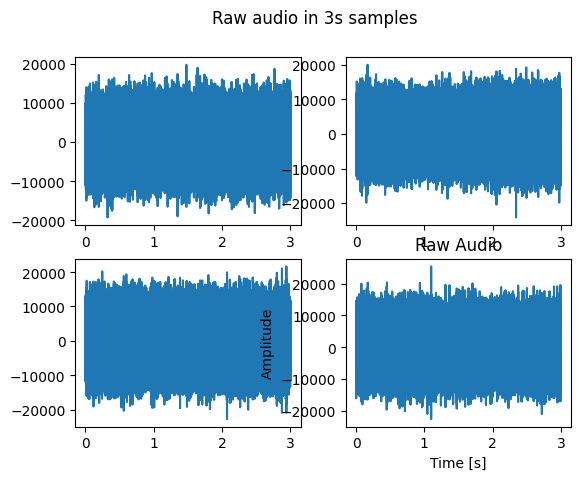

In [13]:

seg_time = np.linspace(0., 3,hc_split_len.shape[0]) #seg_len.shape[0]

fig, axs = plt.subplots(2, 2)
fig.suptitle('Raw audio in 3s samples')
axs[0,0].plot(seg_time, hc_split[0])
axs[0,1].plot(seg_time, hc_split[1])
axs[1,0].plot(seg_time, hc_split[2])
axs[1,1].plot(seg_time, hc_split[3])

#plt.plot(seg_time, split[1])


plt.title("Raw Audio")

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


plt.show()

Only first 6 splits are exactly 3 seconds. The 7th split will be rejected since it is only 2 seconds long.

In [14]:
hc_split.pop(6)

array([ 5451.,  4190.,   444., ...,  1621.,  -281., -1539.], dtype=float32)

In [15]:
hc_split_len = hc_split[0]/hc_samplerate

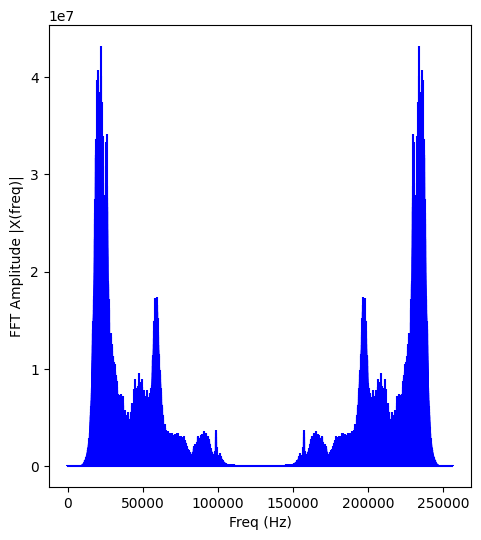

In [16]:
from scipy.fftpack import fft, ifft
hc_split_len = 3

hc_split_N = hc_split[1].shape[0]
hc_split_n = np.arange(hc_split_N)
hc_split_freq = hc_split_n/hc_split_len
hc_split_data_fft = fft(hc_split[1])

plt.figure(figsize = (12, 6))
plt.subplot(121)


plt.stem(hc_split_freq, np.abs(hc_split_data_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.show()

In [31]:

hc_split

[array([   133.,   2008.,    909., ..., -10713.,  -7686.,   -586.],
       dtype=float32),
 array([ 7773., 11353.,  6606., ...,  3361.,  2102.,  -871.], dtype=float32),
 array([-3873., -3091., -5118., ..., -1487., -7882., -9647.], dtype=float32),
 array([ -6543.,  -6708.,  -5260., ..., -10500.,  -6627.,   -732.],
       dtype=float32),
 array([ 3594.,  4394.,  1905., ..., 12128.,  6230.,    59.], dtype=float32),
 array([-5400., -8652., -8349., ...,  -668., -2321.,  1097.], dtype=float32)]

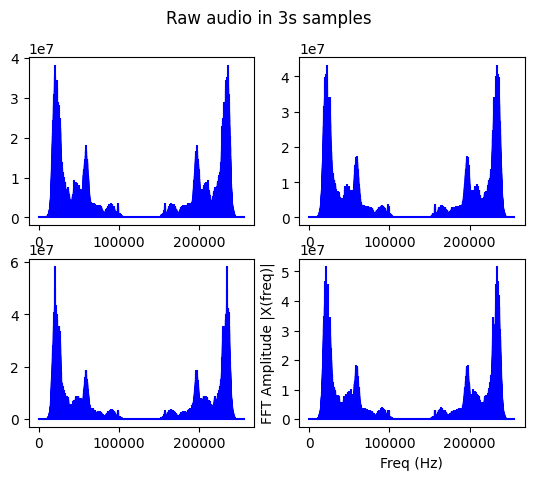

In [36]:

hc_split_freq_plt = []
hc_split_data_fft_plt = []

for t in range(len(hc_split)):
    hc_split_len = 3

    hc_split_N = hc_split[t].shape[0]
    hc_split_n = np.arange(hc_split_N)
    hc_split_freq_plt.append(hc_split_n/hc_split_len)
    hc_split_data_fft_plt.append(fft(hc_split[t]))



fig, axs = plt.subplots(2, 2)
fig.suptitle('Raw audio in 3s samples')
axs[0,0].stem(hc_split_freq_plt[0],np.abs(hc_split_data_fft_plt[0]), 'b', \
         markerfmt=" ", basefmt="-b")
axs[0,1].stem(hc_split_freq_plt[1], np.abs(hc_split_data_fft_plt[1]), 'b', \
         markerfmt=" ", basefmt="-b")
axs[1,0].stem(hc_split_freq_plt[2], np.abs(hc_split_data_fft_plt[2]), 'b', \
         markerfmt=" ", basefmt="-b")
axs[1,1].stem(hc_split_freq_plt[3], np.abs(hc_split_data_fft_plt[3]), 'b', \
         markerfmt=" ", basefmt="-b")



plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.show()


Same procedure for the non-cavitation data.

In [18]:
nc_seg_len = nc_samplerate * 3

sections = int(np.ceil(len(nc_data) / nc_seg_len))

nc_split = []

for i in range(sections):
    t = nc_data[i * nc_seg_len: (i + 1) * nc_seg_len]
    nc_split.append(t)


In [19]:
nc_split_len = nc_split[0]/nc_samplerate

In [20]:
nc_split.pop(6)

array([-294., -281., -123., ..., -397., -303.,   76.], dtype=float32)

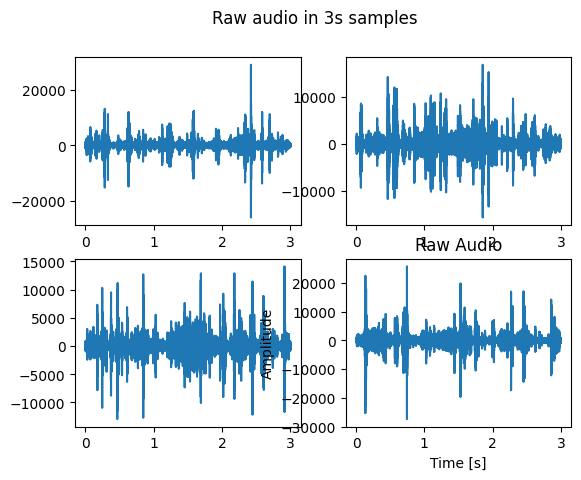

In [21]:

seg_time = np.linspace(0., 3,nc_split_len.shape[0]) #seg_len.shape[0]

fig, axs = plt.subplots(2, 2)
fig.suptitle('Raw audio in 3s samples')
axs[0,0].plot(seg_time, nc_split[0])
axs[0,1].plot(seg_time, nc_split[1])
axs[1,0].plot(seg_time, nc_split[2])
axs[1,1].plot(seg_time, nc_split[3])

#plt.plot(seg_time, split[1])


plt.title("Raw Audio")

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


plt.show()

# Data augumentation

https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47


## Time Shifting

In [22]:
roll = np.roll(hc_data,int(hc_samplerate/10))

In [23]:
roll == hc_data

array([False, False, False, ..., False, False, False])

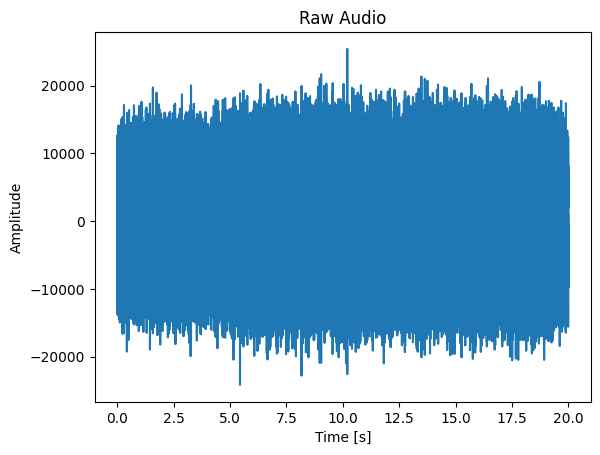

In [24]:
plt_time_domain(hc_length,roll)

In [25]:
roll.shape

(5120000,)

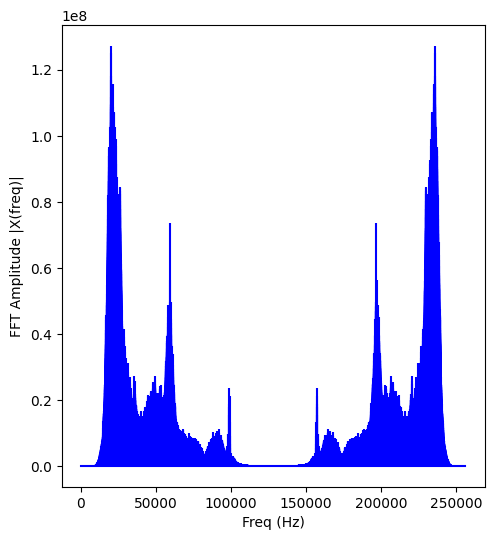

In [26]:
fourier_trans_plot(hc_length,roll)

## Feature extraction

In [37]:
import os
import scipy.io as scio
import math
from scipy import stats
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis, skew
import math
import csv
'''
1. Central Trend Statistics:
   --- mean
   --- median
   --- low quartile
   --- upper quartile
2. Dispersion Degree Statistics:
   --- minimum
   --- maximum
   --- inter quartile range
   --- standard deviation
   --- root mean square
   --- square root amplitude
3. Distribution Shape Statistics
   --- kurtosis
   --- skewness
   --- shape factor
   --- clearance shape
   --- crest factor
'''

path =  Path.cwd()/"data"
file_name = os.listdir(path)


feature_list = []

data = hc_split_data_fft_plt[0]

   # central trend statistics
data_mean = np.mean(data)
data_median = np.median(data)
data_quartile_025 = np.quantile(data, 0.25)
data_quartile_075 = np.quantile(data, 0.75)

   # dispersion degree statistics
data_Minimum = np.min(data)
data_Maximum = np.max(data)
data_quartile = data_quartile_075 - data_quartile_025
data_std = np.std(data)
data_rms = np.sqrt((np.mean(data**2)))
data_sra = (np.sum(np.sqrt(np.abs(data)))/len(data))**2

   # distribution shape statistics
data_kurtosis = kurtosis(data)
data_skew = skew(data)

data_avg = np.mean(np.abs(data))
data_ff = data_rms / data_avg

data_clf = np.max(np.abs(data)) / data_sra
data_cf = np.max(np.abs(data)) / data_rms

feature_list = [data_mean, data_median, data_quartile_025, data_quartile_075, data_Maximum, data_Minimum, data_quartile, data_std, data_rms, data_sra, data_kurtosis, data_skew, data_ff, data_clf, data_cf, "High_cavitation"]
feature_list = pd.DataFrame(data=feature_list).T
#feature_list.to_csv("./test_features.csv",sep=',',mode='a',index=False,encoding='utf-8',header=None)
#print("Work Done")














In [38]:
feature_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,(132.99956-0.0014026692j),(-8402.701+2022.0864j),(-331655.6875-709734.25j),(324030.5859375-92091.46875j),(29593094+10988780j),(-31842952-402221.56j),(655686.2734375+617642.78125j),3347851.25,(178311.27+0.0031129385j),983584.26115,(7040.52169551915-0.003528467653576564j),(-82.66925144443127+8.26214124553411e-06j),(0.10342599+1.8055996e-09j),38.850296,(214.30244-3.7412685e-06j),High_cavitation


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000113,0.0,-256.0,255.0,16852.0,-15726.0,511.0,745.232056,745.232056,320.284433,23.869087,0.043129,1.717514,52.615732,22.613091,High_cavitation
